In [46]:
import pandas as pd

DIR = 'data/new data/'
# bitcoin_time_series = pd.read_csv("drive/MyDrive/File Skripsi/data_bitcoinity_full_daily.csv", parse_dates = ['Time'])
''' #bitcoinity data
bitcoin_time_series = pd.read_csv(DIR + "bitcoin_price_daily.csv", parse_dates = ['Time'])
gtrend_time_series = pd.read_csv(DIR + "daily_gtrend_data_new.csv", parse_dates = ['date'])
block_size = pd.read_csv(DIR + "block_size_cut.csv", parse_dates = ['Time'])
mining_difficulty = pd.read_csv(DIR + "mining_difficulty_daily_cut.csv", parse_dates = ['Time'])
number_of_transaction = pd.read_csv(DIR + "number_of_transaction_cut.csv", parse_dates = ['Time'])
'''

# cmc data
bitcoin_time_series = pd.read_csv(DIR + "cmc_plus_gold_fixed.csv", parse_dates = ['date'])
gtrend_time_series = pd.read_csv(DIR + "daily_gtrend_data_cmc.csv", parse_dates = ['date'])

In [47]:
# gtrend_time_series = pd.read_csv("drive/MyDrive/File Skripsi/daily_gtrend_data.csv", parse_dates = ['date'])

In [48]:
gtrend_time_series.tail()

,date,bitcoin,overlap
3119,2021-11-11,10.0,1.0
3120,2021-11-12,10.0,1.0
3121,2021-11-13,9.0,1.0
3122,2021-11-14,9.0,NaN
3123,2021-11-15,9.0,NaN


In [49]:
dataset = bitcoin_time_series.copy()
dataset['gtrend'] = gtrend_time_series['bitcoin']

In [50]:
dataset = dataset.drop(columns=['index'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3124 entries, 0 to 3123
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        3124 non-null   datetime64[ns]
 1   open        3124 non-null   float64       
 2   high        3124 non-null   float64       
 3   low         3124 non-null   float64       
 4   close       3124 non-null   float64       
 5   volume      3124 non-null   float64       
 6   marketcap   3124 non-null   float64       
 7   gold_price  3124 non-null   float64       
 8   gtrend      3124 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 219.8 KB


In [51]:
dataset.corr()

,open,high,low,close,volume,marketcap,gold_price,gtrend
open,1.000000,0.999524,0.999150,0.998871,0.764514,0.998673,0.072090,0.534931
high,0.999524,1.000000,0.999071,0.999520,0.767455,0.999259,0.073242,0.541221
low,0.999150,0.999071,1.000000,0.999415,0.757674,0.999299,0.071338,0.523668
close,0.998871,0.999520,0.999415,1.000000,0.763104,0.999795,0.072700,0.534316
volume,0.764514,0.767455,0.757674,0.763104,1.000000,0.762293,0.086220,0.506935
marketcap,0.998673,0.999259,0.999299,0.999795,0.762293,1.000000,0.077240,0.522092
gold_price,0.072090,0.073242,0.071338,0.072700,0.086220,0.077240,1.000000,-0.047950
gtrend,0.534931,0.541221,0.523668,0.534316,0.506935,0.522092,-0.047950,1.000000


In [52]:
print('price mean :', dataset['open'].mean())
print('gtrend mean :', dataset['gtrend'].mean())
print('price stdv :', dataset['open'].std())
print('gtrend stdv :', dataset['gtrend'].std())

price mean : 8457.026504481439
gtrend mean : 5.092189500640205
price stdv : 14015.065825230788
gtrend stdv : 6.949971018486541


In [53]:
del gtrend_time_series
del bitcoin_time_series

In [54]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('open ~ volume+gtrend', data=dataset, return_type='dataframe')

In [56]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

In [57]:
vif

,VIF,variable
0,1.620732,Intercept
1,1.345864,volume
2,1.345864,gtrend


In [58]:
dataset.tail()

,date,open,high,low,close,volume,marketcap,gold_price,gtrend
3119,2021-11-11,64978.89,65579.01,64180.49,64949.96,3.588063e+10,1.225643e+12,1863.90,10.0
3120,2021-11-12,64863.98,65460.81,62333.91,64155.94,3.608489e+10,1.210715e+12,1868.50,10.0
3121,2021-11-13,64158.12,64915.67,63303.73,64469.53,3.047423e+10,1.216695e+12,1469.50,9.0
3122,2021-11-14,64455.37,65495.18,63647.81,65466.84,2.512209e+10,1.235579e+12,1472.75,9.0
3123,2021-11-15,65521.29,66281.57,63548.14,63557.87,3.055876e+10,1.199611e+12,1866.60,9.0


In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from modified_recurrent_v2 import GRU

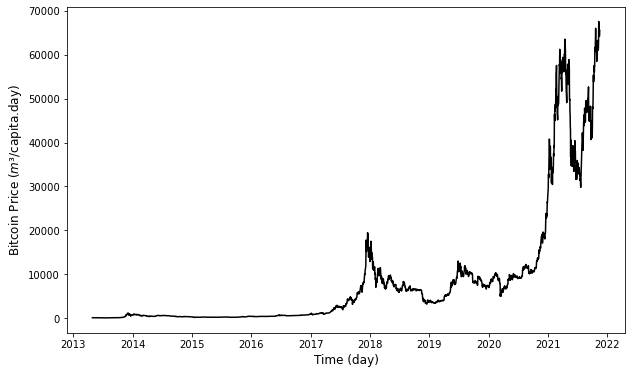

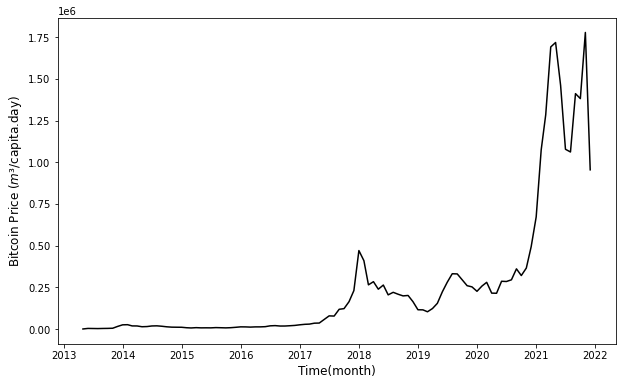

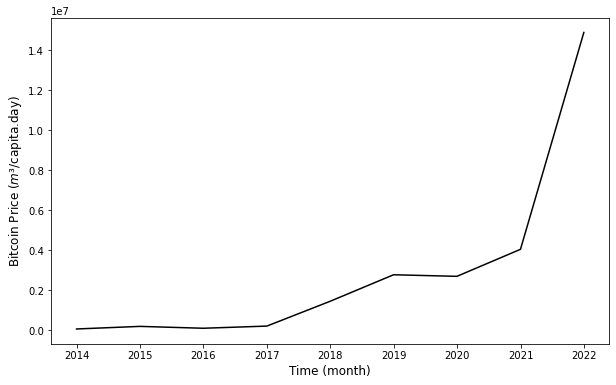

In [60]:
def timeseries (x_axis, y_axis, x_label):
    plt.figure(figsize = (10, 6))
    plt.plot(x_axis, y_axis, color ='black')
    plt.xlabel(x_label, {'fontsize': 12}) 
    plt.ylabel('Bitcoin Price ($m³$/capita.day)', 
                                  {'fontsize': 12})
dataset_to_plt = dataset.copy()
dataset_to_plt = dataset_to_plt.set_index('date')
timeseries(dataset_to_plt.index, dataset_to_plt['open'], 'Time (day)')
dataset_to_plt['month'] = dataset_to_plt.index.month
dataset_by_month = dataset_to_plt.resample('M').sum()
timeseries(dataset_by_month.index, dataset_by_month['open'], 
           'Time(month)')
dataset_to_plt['year'] = dataset_to_plt.index.year
dataset_by_year = dataset_to_plt.resample('Y').sum()
timeseries(dataset_by_year.index, dataset_by_year['open'], 
           'Time (month)')

In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3124 entries, 0 to 3123
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        3124 non-null   datetime64[ns]
 1   open        3124 non-null   float64       
 2   high        3124 non-null   float64       
 3   low         3124 non-null   float64       
 4   close       3124 non-null   float64       
 5   volume      3124 non-null   float64       
 6   marketcap   3124 non-null   float64       
 7   gold_price  3124 non-null   float64       
 8   gtrend      3124 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 219.8 KB


In [62]:
# Check for missing values
print('Total num of missing values:') 
print(dataset.open.isna().sum())
print('')
# Locate the missing value
df_missing_date = dataset.loc[dataset.open.isna() == True]
print('The date of missing value:')
print(df_missing_date.loc[:,['date']])
# Replcase missing value with interpolation
dataset.open.interpolate(inplace = True)
# Keep WC and drop Date
dataset = dataset.drop('date', axis = 1)

Total num of missing values:
0

The date of missing value:
Empty DataFrame
Columns: [date]
Index: []


In [63]:
# Split train data and test data
train_size = int(len(dataset)*0.8)
print('Sequence length: ', int(len(dataset)))
print(train_size)

train_data = dataset.iloc[:train_size]
test_data = dataset.iloc[train_size:]

Sequence length:  3124
2499


In [64]:
#Scaling with Min Max
scaler = MinMaxScaler().fit(dataset)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [65]:
print("Data max "+str(scaler.data_max_))
print("Data min "+str(scaler.data_min_))

Data max [6.75497400e+04 6.87896300e+04 6.63820600e+04 6.75668300e+04
 3.50967941e+11 1.27483149e+12 3.11800000e+03 1.00000000e+02]
Data min [6.85000000e+01 7.45600000e+01 6.55300000e+01 6.84300000e+01
 0.00000000e+00 7.78411179e+08 1.04960000e+03 0.00000000e+00]


In [66]:
test_scaled

array([[0.12642417, 0.12591474, 0.1267509 , ..., 0.12202049, 0.09156836,
        0.04      ],
       [0.12588328, 0.12874541, 0.12767707, ..., 0.12643332, 0.27078902,
        0.04      ],
       [0.13036053, 0.12845858, 0.13027612, ..., 0.12527356, 0.26564011,
        0.04      ],
       ...,
       [0.94973981, 0.94362285, 0.95358126, ..., 0.95436896, 0.20300716,
        0.09      ],
       [0.95414474, 0.95205637, 0.95876971, ..., 0.96919085, 0.20457842,
        0.09      ],
       [0.96994053, 0.96350058, 0.95726676, ..., 0.94095976, 0.3949913 ,
        0.09      ]])

In [67]:
train_scaled

array([[0.0009899 , 0.00089384, 0.00100382, ..., 0.0005574 , 0.19950203,
        0.01      ],
       [0.00097716, 0.00106134, 0.00103247, ..., 0.00064782, 0.20445755,
        0.01      ],
       [0.00111883, 0.00105319, 0.00103323, ..., 0.00059998, 0.20457842,
        0.01      ],
       ...,
       [0.12976332, 0.12891393, 0.12834915, ..., 0.12515969, 0.28862889,
        0.05      ],
       [0.12922451, 0.12829646, 0.12707842, ..., 0.12356887, 0.27883872,
        0.05      ],
       [0.12748299, 0.12662535, 0.12868556, ..., 0.12253616, 0.08661284,
        0.04      ]])

In [68]:
# Create input dataset
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 30
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
# Print data shape
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape) 
print('y_test.shape: ', y_test.shape)

X_train.shape:  (2469, 30, 8)
y_train.shape:  (2469, 8)
X_test.shape:  (595, 30, 8)
y_test.shape:  (595, 8)


In [69]:
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]]))
    # model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(y_train.shape[1])) 
    #Compile model
    model.compile(optimizer='adam',loss='mse', metrics=['accuracy','mape'])
    return model
model_gru = create_gru(64)

is_ragged_input : False
masuk gru_with_backend_selection
Goes to standard GRU
masuk gpu_gru_with_fallback
Masuk GPU GRU
is_ragged_input : False
masuk gru_with_backend_selection
Goes to standard GRU
masuk gpu_gru_with_fallback
Masuk GPU GRU


In [70]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='checkpoint_model',
                                                 save_weights_only=True,
                                                 verbose=1)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop, cp_callback])
    return history
history_gru = fit_model(model_gru)

Epoch 1/100
is_ragged_input : False
masuk gru_with_backend_selection
Goes to standard GRU
masuk gpu_gru_with_fallback
Masuk GPU GRU
is_ragged_input : False
masuk gru_with_backend_selection
Goes to standard GRU
masuk gpu_gru_with_fallback
Masuk GPU GRU
is_ragged_input : False
masuk gru_with_backend_selection
Goes to standard GRU
masuk gpu_gru_with_fallback
Masuk GPU GRU
is_ragged_input : False
masuk gru_with_backend_selection
Goes to standard GRU
masuk gpu_gru_with_fallback
Masuk GPU GRU
123/124 [============================>.] - ETA: 0s - loss: 0.0079 - accuracy: 0.8537 - mape: 430649.9375is_ragged_input : False
masuk gru_with_backend_selection
Goes to standard GRU
masuk gpu_gru_with_fallback
Masuk GPU GRU
is_ragged_input : False
masuk gru_with_backend_selection
Goes to standard GRU
masuk gpu_gru_with_fallback
Masuk GPU GRU
124/124 [==============================] - 18s 74ms/step - loss: 0.0079 - accuracy: 0.8516 - mape: 429123.7188 - val_loss: 0.0027 - val_accuracy: 0.3704 - val_mape:

In [82]:
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

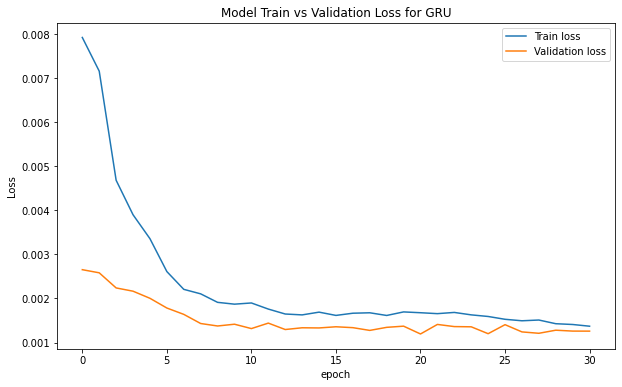

In [83]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')

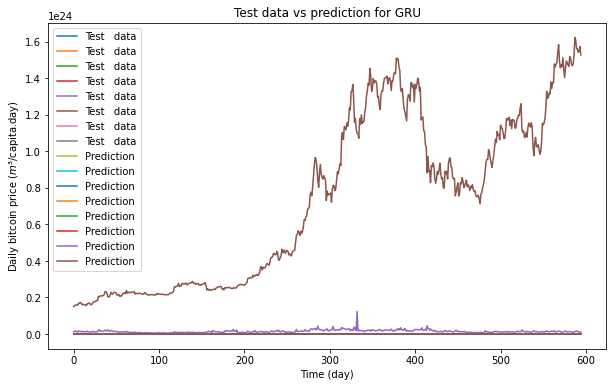

In [84]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
# prediction_bilstm = prediction(model_bilstm)
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label='Test   data')
    plt.plot(np.arange(range_future), 
             np.array(prediction),label='Prediction')
    plt.title('Test data vs prediction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Time (day)')
    plt.ylabel('Daily bitcoin price ($m³$/capita.day)')
 
plot_future(prediction_gru, 'GRU', y_test)

In [85]:
prediction_gru[1][:]

array([ 5.4498374e+03,  5.4775215e+03,  5.3682178e+03,  5.3078818e+03,
        4.7721098e+09,  9.0435101e+10,  1.7380614e+03, -2.6448667e-01],
      dtype=float32)

In [75]:
prediction_gru.shape

(595, 8)

In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3124 entries, 0 to 3123
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   open        3124 non-null   float64
 1   high        3124 non-null   float64
 2   low         3124 non-null   float64
 3   close       3124 non-null   float64
 4   volume      3124 non-null   float64
 5   marketcap   3124 non-null   float64
 6   gold_price  3124 non-null   float64
 7   gtrend      3124 non-null   float64
dtypes: float64(8)
memory usage: 195.4 KB


In [77]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')
evaluate_prediction(prediction_gru, y_test, 'GRU')

GRU:
Mean Absolute Error: 27254577210.0245
Root Mean Square Error: 87201198974.1933



In [78]:
#saving model in h5 format
model_gru.save('my_model_with_gtrend_gold.h5')

In [79]:
X_30 = np.array((30,3))

In [80]:
X_30.shape

(2,)

In [81]:
# Make prediction for new data
def prediction(model):
    prediction = model.predict(X_30)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
# prediction_bilstm = prediction(model_bilstm)
# Plot history and future
def plot_multi_step(history, prediction1):
    
    plt.figure(figsize=(15, 6))
    
    range_history = len(history)
    range_future = list(range(range_history, range_history +
                        len(prediction1)))
    plt.plot(np.arange(range_history), np.array(history), 
             label='History')
    plt.plot(range_future, np.array(prediction1),
             label='Forecasted for GRU')
    # plt.plot(range_future, np.array(prediction2),
    #          label='Forecasted for BiLSTM')
      
    plt.legend(loc='upper right')
    plt.xlabel('Time step (day)')
    plt.ylabel('Water demand (lit/day)')
        
plot_multi_step(new_data, prediction_gru)

ValueError: in user code:

    C:\Users\Master\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    C:\Users\Master\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Master\anaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Master\anaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Master\anaconda3\envs\tf\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Master\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py:1569 run_step  **
        outputs = model.predict_step(data)
    C:\Users\Master\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py:1537 predict_step
        return self(x, training=False)
    C:\Users\Master\anaconda3\envs\tf\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\Master\anaconda3\envs\tf\lib\site-packages\keras\engine\input_spec.py:214 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 1)
